In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import statsmodels.api as sm
import matplotlib as mpl

(150, 2)


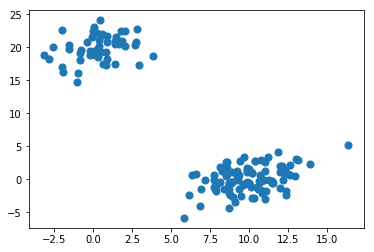

In [3]:
from scipy.cluster.hierarchy import linkage, dendrogram
np.set_printoptions(precision=5, suppress=True) 

np.random.seed(4711)  # for repeatability of this tutorial
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)
print(X.shape)

plt.scatter(X[:,0], X[:,1], s=50)
plt.show()

In [15]:
Z = linkage(X, 'ward')
Z

array([[ 52.     ,  53.     ,   0.04151,   2.     ],
       [ 14.     ,  79.     ,   0.05914,   2.     ],
       [ 33.     ,  68.     ,   0.07107,   2.     ],
       [ 17.     ,  73.     ,   0.07137,   2.     ],
       [  1.     ,   8.     ,   0.07543,   2.     ],
       [ 85.     ,  95.     ,   0.10928,   2.     ],
       [108.     , 131.     ,   0.11007,   2.     ],
       [  9.     ,  66.     ,   0.11302,   2.     ],
       [ 15.     ,  69.     ,   0.11429,   2.     ],
       [ 63.     ,  98.     ,   0.1212 ,   2.     ],
       [107.     , 115.     ,   0.12167,   2.     ],
       [ 65.     ,  74.     ,   0.1249 ,   2.     ],
       [ 58.     ,  61.     ,   0.14028,   2.     ],
       [ 62.     , 152.     ,   0.1726 ,   3.     ],
       [ 41.     , 158.     ,   0.1779 ,   3.     ],
       [ 10.     ,  83.     ,   0.18635,   2.     ],
       [114.     , 139.     ,   0.20419,   2.     ],
       [ 39.     ,  88.     ,   0.20628,   2.     ],
       [ 70.     ,  96.     ,   0.21931,   2. 

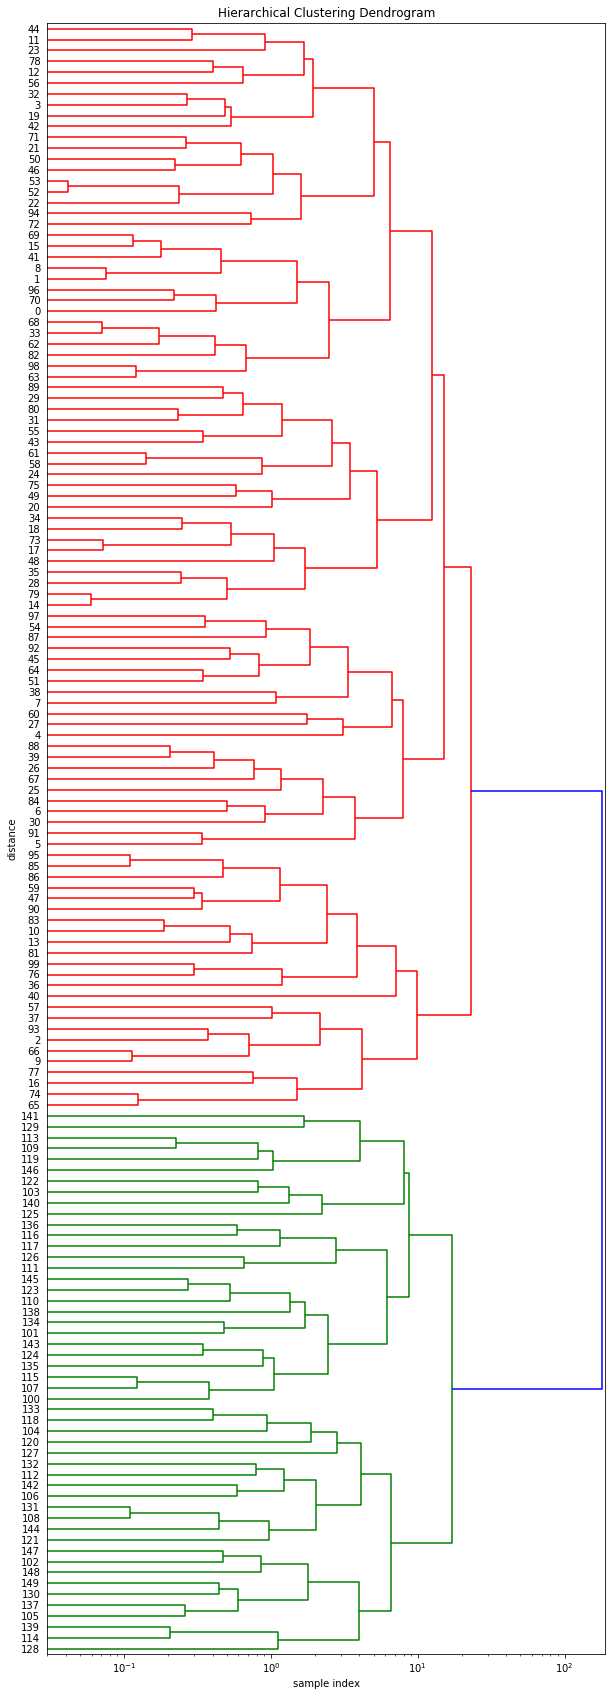

In [12]:
mpl.rcParams["font.family"] = 'DejaVu Sans'
plt.figure(figsize=(10,30))
ax = plt.subplot(111)
dendrogram(Z, leaf_font_size=10, orientation='right')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
ax.set_xlim(xmin=0.03)
ax.set_xscale('log')
plt.show()

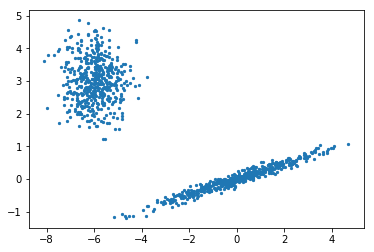

In [39]:
from numpy.random import randn

n_samples = 500

mu1 = np.array([0, 0])
mu2 = np.array([-6, 3])
sigma1 = np.array([[0., -0.1], [1.7, .4]])
sigma2 = np.eye(2)

np.random.seed(0)
X = np.r_[1.0 * np.dot(randn(n_samples, 2), sigma1) + mu1,
          0.7 * np.dot(randn(n_samples, 2), sigma2) + mu2,
         ]
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.show()

In [41]:
from sklearn.mixture import GaussianMixture


In [42]:
model = GaussianMixture(n_components=2, init_params='random', random_state=0, max_iter=1)
model.fit(X)

/home/hskimim/anaconda3/lib/python3.6/site-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


GaussianMixture(covariance_type='full', init_params='random', max_iter=1,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [43]:
gamma = model.predict_proba(X)


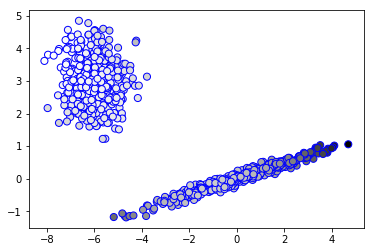

In [44]:
plt.scatter(X[:, 0], X[:, 1], s=50, linewidth=1, edgecolors="b", cmap=plt.cm.binary, c=gamma[:, 0])
plt.show()

In [45]:
def plot_gaussianmixture(n, k=10):
    model = GaussianMixture(n_components=2, init_params='random', random_state=1, tol=1e-9, max_iter=n)
    model.fit(X)
    gamma = model.predict_proba(X)
    plt.scatter(X[:, 0], X[:, 1], s=50, linewidth=1, edgecolors="b", cmap=plt.cm.binary, c=gamma[:, 0])
    plt.show()
    return model

/home/hskimim/anaconda3/lib/python3.6/site-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


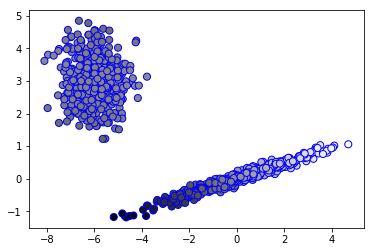

In [46]:
plot_gaussianmixture(5);


/home/hskimim/anaconda3/lib/python3.6/site-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


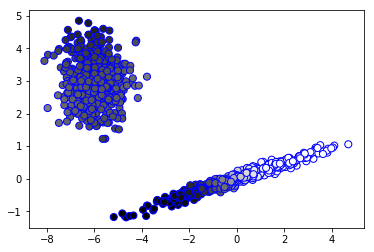

In [47]:
plot_gaussianmixture(10);


/home/hskimim/anaconda3/lib/python3.6/site-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


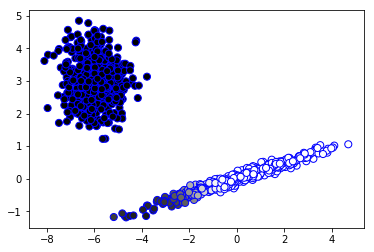

In [48]:
plot_gaussianmixture(15);


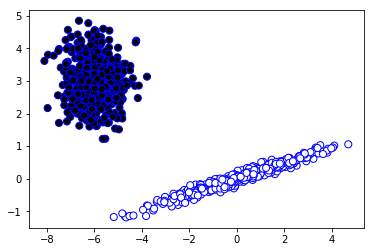

In [49]:
plot_gaussianmixture(20);


In [ ]:
from hmmlearn import hmm
np.random.seed(3)

model = hmm.GaussianHMM(n_components=2, covariance_type="diag")
model.startprob_ = np.array([0.9, 0.1])
model.transmat_ = np.array([[0.95, 0.05],[0.15, 0.85]])
model.means_ = np.array([[1.0], [-3.0]])
model.covars_ = np.array([[15.0], [40.0]])
X, Z = model.sample(500)

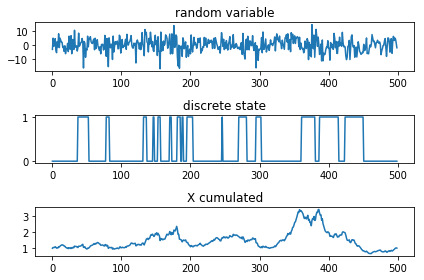

In [54]:
plt.subplot(311)
plt.plot(X)
plt.title("random variable")
plt.subplot(312)
plt.plot(Z)
plt.title("discrete state")
plt.subplot(313)
plt.plot((1 + 0.01*X).cumprod())
plt.title("X cumulated")
plt.tight_layout()
plt.show()

/home/hskimim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


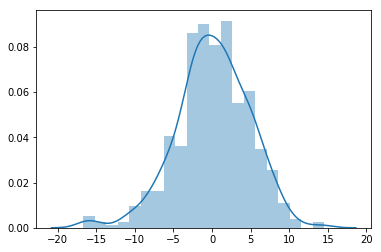

In [55]:
sns.distplot(X)
plt.show()

In [ ]:
model2 = hmm.GaussianHMM(n_components=2, n_iter=len(X)).fit(X)
model2

In [58]:
Z_hat = model2.decode(X)[1]
X_cum = (1 + 0.01*X).cumprod()
X_cum_hat = X_cum.copy()
X_cum_hat[Z_hat == 0] = np.nan

/home/hskimim/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


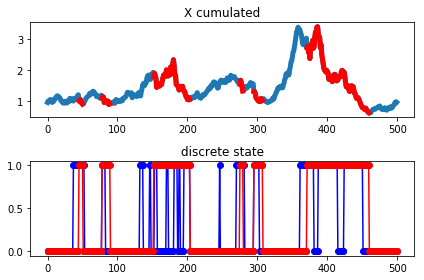

In [59]:
plt.subplot(211)
plt.plot(X_cum, lw=5)
plt.plot(X_cum_hat, 'r-', lw=5)
plt.title("X cumulated")
plt.subplot(212)
plt.plot(Z, 'bo-')
plt.plot(Z_hat, 'ro-')
plt.title("discrete state")
plt.tight_layout()
plt.show()